In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [7]:
df = pd.read_csv("/content/Unemployment_in_India.csv")  # Replace with your dataset name
print(df.head())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [8]:
# Rename columns for simplicity
df.columns = [col.strip().replace(" ", "_") for col in df.columns]

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for nulls
print(df.isnull().sum())

# Fill or drop missing values
df.dropna(inplace=True)


Region                                     28
Date                                       28
Frequency                                  28
Estimated_Unemployment_Rate_(%)            28
Estimated_Employed                         28
Estimated_Labour_Participation_Rate_(%)    28
Area                                       28
dtype: int64


/tmp/ipython-input-8-618943329.py:5: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


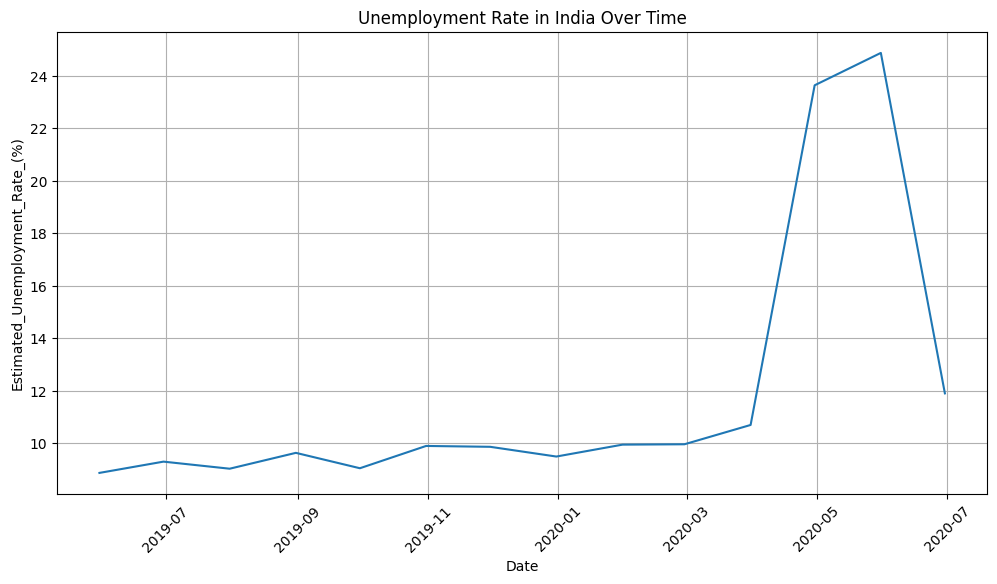

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Estimated_Unemployment_Rate_(%)', errorbar=None)
plt.title("Unemployment Rate in India Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

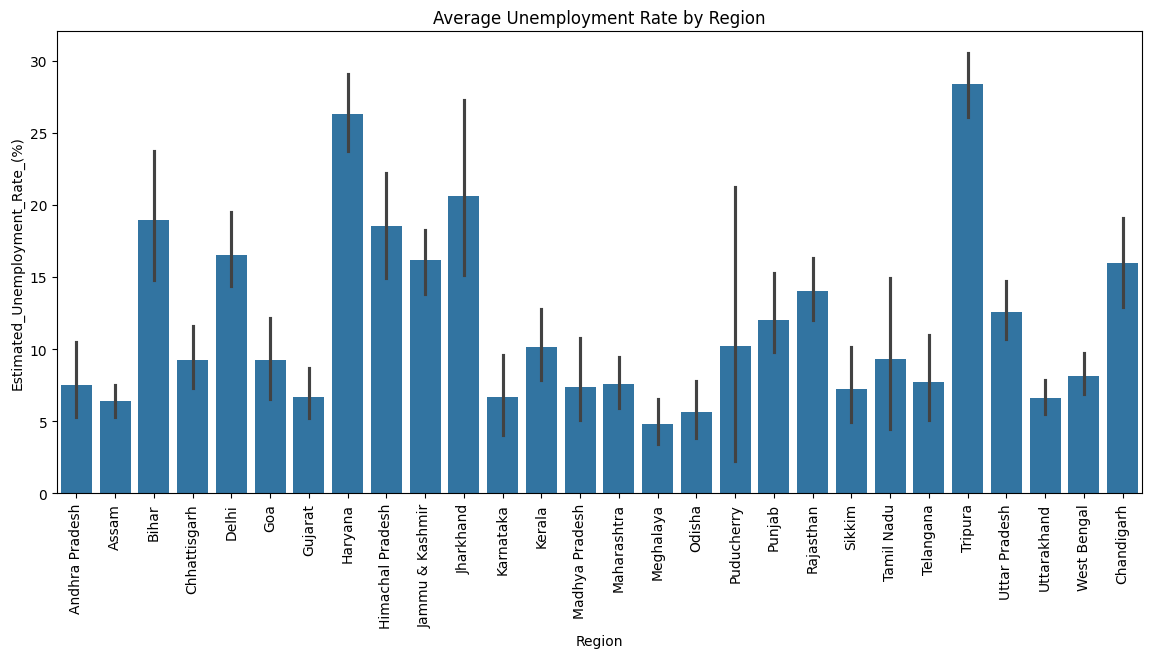

In [12]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x='Region', y='Estimated_Unemployment_Rate_(%)', estimator=np.mean)
plt.title("Average Unemployment Rate by Region")
plt.xticks(rotation=90)
plt.show()

In [14]:
fig = px.scatter_geo(df,
                     locations='Region', # Use 'Region' for locations
                     locationmode='country names', # or 'ISO-3' or 'USA-states' depending on your data
                     color='Estimated_Unemployment_Rate_(%)',
                     size='Estimated_Unemployment_Rate_(%)',
                     hover_name='Region',
                     title='Unemployment Rate Across India')
fig.show()

In [16]:
fig = px.line(df, x='Date', y='Estimated_Unemployment_Rate_(%)', color='Region',
              title='Unemployment Rate Trends by Region')
fig.show()

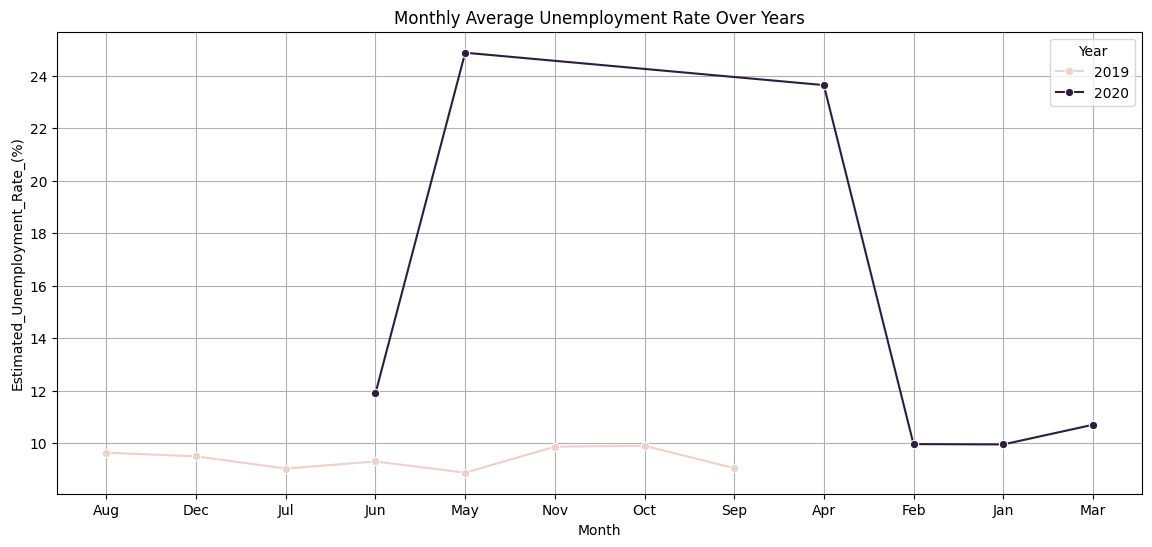

In [18]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%b')

monthly_trend = df.groupby(['Year', 'Month'])['Estimated_Unemployment_Rate_(%)'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_trend, x='Month', y='Estimated_Unemployment_Rate_(%)', hue='Year', marker='o')
plt.title("Monthly Average Unemployment Rate Over Years")
plt.grid(True)
plt.show()